## Assignment-03 First Step of Machine Learning: Model and Evaluation¶


### Part-1 Programming Review 编程回顾¶


#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)¶


In [178]:
import random
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt

In [179]:
X = np.random.random((20,1))

In [180]:
print(X)

[[0.72330597]
 [0.19831127]
 [0.45191137]
 [0.78810732]
 [0.9344699 ]
 [0.38851624]
 [0.75486978]
 [0.65488088]
 [0.43874249]
 [0.0717743 ]
 [0.96779667]
 [0.97912142]
 [0.94987724]
 [0.86264278]
 [0.39054584]
 [0.86449106]
 [0.01806532]
 [0.8163371 ]
 [0.29317692]
 [0.8788524 ]]


In [181]:
def line_function(x):
    return 5.2*x+13.14+random.randint(-1,1)

In [182]:
y = [line_function(x) for x in X]

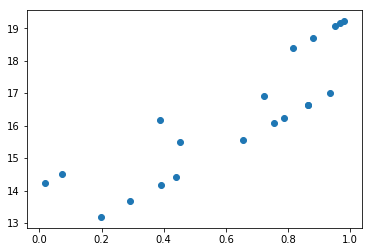

In [183]:
plt.scatter(X,y)

In [184]:
lr = LinearRegression().fit(X,y)

In [185]:
k = lr.coef_
print(k)
b = lr.intercept_
print(b)

[[5.27152656]]
[12.99556128]


In [186]:
def f(x):
    return k*x+b

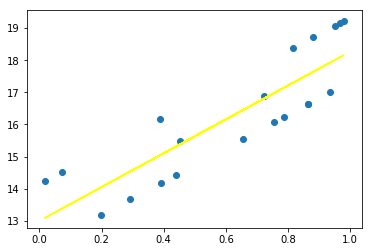

In [187]:
plt.scatter(X,y)
plt.plot(X,f(X),color='yellow')

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

In [188]:
from collections import Counter
from scipy.spatial.distance import cosine


In [189]:
def X_y_model(trainX,trainY):
    return[(Xi,yi) for Xi,yi in zip(trainX,trainY)]

In [190]:
def distance(x1,x2):
    return abs(x1-x2)

In [191]:
def knn_predict(testx,trainX,trainY,count):
    result = sorted(X_y_model(trainX,trainY),key=lambda x1:distance(x1[0],testx))[:count]
    y_list = [x_y[1][0] for x_y in result ]
    best_result = Counter(y_list).most_common(count)
    print(best_result)
    return best_result[0][0]

In [192]:
knn_predict(0.3,X,y,10)

[(13.664519990755952, 1), (16.160284457480547, 1), (14.1708383931852, 1), (13.171218612264079, 1), (14.421460934335993, 1), (15.489939127467292, 1), (14.513226371859387, 1), (14.233939670876229, 1), (15.545380601633394, 1), (16.90119101941667, 1)]


13.664519990755952

In [193]:
f(0.3)

array([[14.57701924]])

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)¶


In [194]:
import pandas as pd

In [207]:
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in elements]
    return - sum(p * np.log(p) for p in probs)

In [210]:
data = {
    'gender':['F','F','F','M','M','M','M','M','F','M'],
    'fair_color':['black','red','blue','yellow','blue','red','blue','red','yellow','yellow'],
    'fighting_capacity':[50000,80000,1000,10000,100000,2000,2000,100000,100000,1000],
    'super_saiyan':[0,0,0,1,1,0,0,1,0,0]
}

In [211]:
dataset = pd.DataFrame.from_dict(data)

In [212]:
dataset

,gender,fair_color,fighting_capacity,super_saiyan
0,F,black,50000,0
1,F,red,80000,0
2,F,blue,1000,0
3,M,yellow,10000,1
4,M,blue,100000,1
5,M,red,2000,0
6,M,blue,2000,0
7,M,red,100000,1
8,F,yellow,100000,0
9,M,yellow,1000,0


In [213]:
set(data['fair_color'])

{'black', 'blue', 'red', 'yellow'}

In [214]:
sub_split_1 = dataset[dataset['gender']=='F']['super_saiyan'].tolist()
sub_split_1


[0, 0, 0, 0]

In [219]:
def find_min_feature_spilter(train_data:pd.DataFrame,target:str) ->str:
    features = set(train_data.columns.tolist()) - {target}
    spliter = None
    min_entropy = float('inf')
    for f in features:
        values = set(train_data[f])
        for v in values:
            sub_spliter1 = train_data[train_data[f]==v][target].tolist()
            entropy1 = entropy(sub_spliter1)
            
            sub_spliter2 = train_data[train_data[f]!=v][target].tolist()
            entropy2 = entropy(sub_spliter2)
            
            entropy_v = entropy1 + entropy2
            
            if entropy_v<=min_entropy:
                min_entropy = entropy_v
                spliter = (f,v)
    print(spliter)
    return spliter
            

In [220]:
find_min_feature_spilter(dataset,'super_saiyan')

('fighting_capacity', 100000)


('fighting_capacity', 100000)

In [223]:
dataset[dataset['fighting_capacity']==100000]

,gender,fair_color,fighting_capacity,super_saiyan
4,M,blue,100000,1
7,M,red,100000,1
8,F,yellow,100000,0


In [224]:
find_min_feature_spilter(dataset[dataset['fighting_capacity']==100000],'super_saiyan')

('gender', 'F')


('gender', 'F')